In [1]:
import DataHandlers
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
# Demand data from previous spreadsheet planner | Exported 13 May 2019 @ 19:30
confirmed_fte = [17.00, 22.00, 25.50, 27.50, 30.00, 28.00, 30.50, 28.50, 32.00, 31.00, 37.50, 40.00, 39.00, 35.50, 30.00, 29.50, 27.00, 24.50, 24.00, 23.00, 22.50, 22.00, 17.50, 18.00, 18.00, 16.50, 17.50, 17.50, 17.50, 13.00, 12.00, 12.00, 12.00, 12.00, 11.00, 10.00, 10.00, 10.00, 9.00, 9.00, 9.00]

confirmed_fte = pd.Series(confirmed_fte, 
                          index=pd.date_range(start=pd.datetime(2018,11,1),end=pd.datetime(2022,3,31), freq='M'),
                          name='spreadsheet confirmed')
confirmed_fte.index = confirmed_fte.index


unconfirmed_fte = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 6.50, 6.50, 6.50, 6.50, 7.50, 7.50, 6.50, 5.50, 5.50, 5.50, 5.50, 5.50, 8.00, 8.00, 8.00, 8.00, 8.50, 8.50, 7.50, 6.50, 6.50, 6.50, 6.50, 6.50, 0.50, 0.50, 0.00, 0.00, 0.00, 0.00, 0.00]

unconfirmed_fte = pd.Series(unconfirmed_fte, 
                          index=pd.date_range(start=pd.datetime(2018,11,1),end=pd.datetime(2022,3,31), freq='M'),
                          name='spreadsheet unconfirmed')
unconfirmed_fte.index = confirmed_fte.index


total_fte = confirmed_fte + unconfirmed_fte

In [3]:
#start_date = fc.date_range.min()
#end_date = fc.date_range.max()

start_date = pd.datetime(2017,4,1)
end_date = pd.datetime(2022,3,31)
offset=15

In [4]:
# Load capacity data exported from previous spreadsheet planner 13 May 2019
capacity = pd.read_csv('reg_capacity.csv', index_col='Month')
capacity = capacity.T
capacity.index = pd.to_datetime(capacity.index, format='%b-%y')
capacity = capacity.loc[start_date:end_date]
capacity[1:10]

Month,REG Permanent capacity,REG FTC capacity,REG Associate capacity,University Partner capacity,Total capacity
2017-05-01,4.5,0.0,0.0,0.0,4.5
2017-06-01,5.5,0.0,0.0,0.0,5.5
2017-07-01,5.5,0.0,0.0,0.0,5.5
2017-08-01,5.5,0.0,0.0,0.0,5.5
2017-09-01,5.5,0.0,0.0,0.0,5.5
2017-10-01,6.0,0.0,0.0,0.0,6.0
2017-11-01,7.0,0.0,0.0,0.0,7.0
2017-12-01,8.5,0.0,0.0,0.0,8.5
2018-01-01,10.0,0.0,0.0,0.0,10.0


In [5]:
fc = DataHandlers.Forecast(data_source='csv')

## Bug?
Why does `resample('M')` drop April 2017?

In [6]:
fc.project_reqs.sum(axis=1).loc[start_date:end_date][1:10]

2017-04-04    2.64375
2017-04-05    2.64375
2017-04-06    2.64375
2017-04-07    2.64375
2017-04-10    2.64375
2017-04-11    2.64375
2017-04-12    2.64375
2017-04-13    2.64375
2017-04-18    2.64375
dtype: float64

In [7]:
fc.project_reqs.sum(axis=1).loc[start_date:end_date].resample('M').mean()[1:10]

2017-05-31    3.247500
2017-06-30    4.462500
2017-07-31    4.590000
2017-08-31    4.757500
2017-09-30    4.836250
2017-10-31    5.235000
2017-11-30    6.922500
2017-12-31    8.000461
2018-01-31    8.611250
Freq: M, dtype: float64

In [8]:
reqs = fc.project_reqs.sum(axis=1)
reqs = DataHandlers.select_date_range(reqs, start_date, end_date, drop_zero_cols=False)
#reqs = reqs.loc[start_date:end_date]
reqs = reqs.resample('M').mean()

# , loffset=pd.Timedelta(-offset, unit='D')

# exclude hut 23, trac days etc. ???

unconfirmed = fc.placeholder_totals[26903] + fc.placeholder_totals[26910]
unconfirmed = unconfirmed.resample('M').mean() 

deferred = fc.placeholder_totals[26905]
deferred = deferred.resample('M').mean() 

to_plot = pd.DataFrame({'Confirmed demand':reqs,'Unconfirmed demand':unconfirmed, 'Deferred demand':deferred})
reqs[1:10]

2017-05-31    3.247500
2017-06-30    4.462500
2017-07-31    4.590000
2017-08-31    4.757500
2017-09-30    4.836250
2017-10-31    5.235000
2017-11-30    6.922500
2017-12-31    8.000461
2018-01-31    8.611250
Freq: M, dtype: float64

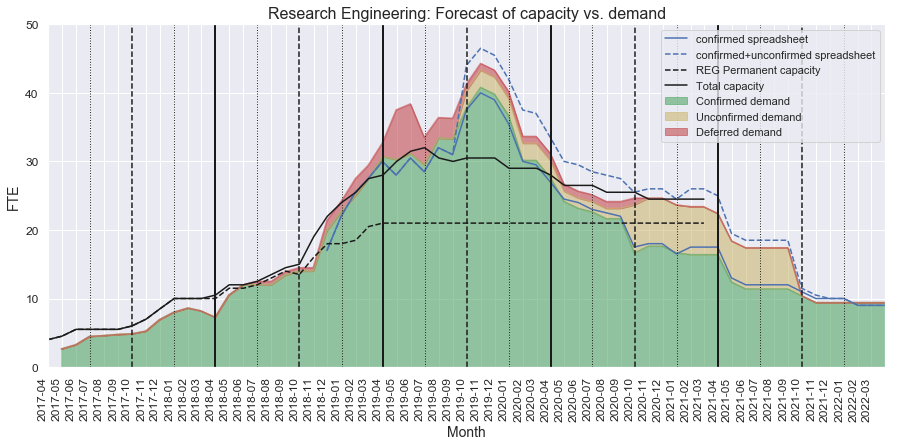

In [10]:
fig = plt.figure(figsize=(15,7))
ax = fig.gca()

to_plot.plot.area(ax=ax, label='Project Demand', x_compat=True, rot=90, alpha=0.6, color=['g','y','r'], stacked=True)


confirmed_fte.plot(ax=ax, color='b', rot=90, label='confirmed spreadsheet')
total_fte.plot(ax=ax, color='b',linestyle='--', rot=90, label='confirmed+unconfirmed spreadsheet')
capacity['REG Permanent capacity'].plot(ax=ax, color='k', linestyle='--', rot=90)
capacity['Total capacity'].plot(ax=ax, color='k', rot=90)

xlim = ax.get_xlim()

#ylim = ax.get_ylim()
ylim = (0,50)

quarters = pd.date_range(start=reqs.index.min(),end=reqs.index.max(),freq='QS')
for q in quarters:
    if q.month==4:
        linestyle = '-'
        linewidth = '2'
    
    elif q.month==7:
        linestyle = ':'
        linewidth = '1'        
    
    elif q.month==10:
        linestyle = '--'
        linewidth = '1.5'        
    
    elif q.month==1:
        linestyle = ':'
        linewidth = '1'
    
    ax.plot([q, q], ylim, linestyle=linestyle, linewidth=linewidth, color='k')

# format tick labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.set_xticklabels(reqs.index.strftime("%Y-%m").values, fontsize=12)
plt.yticks(fontsize=12)

ax.legend()
ax.set_ylabel('FTE', fontsize=14)
ax.set_xlabel('Month', fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Research Engineering: Forecast of capacity vs. demand', fontsize=16);

## Queries on graph
1. Missing demand for 2017-18 (some from missing data in Forecast, some from April 2017 being dropped by `resample`)
2. Demand / Capacity mismatch 2018-19
3. Demand datapoints are at end of month but capacity data points are at start of month. Ideally both will be in middle of month
4. Missing unconfirmed demand compared to spreadsheet
5. Capacity lines need extended to April 2022
6. Can we do a cumulative sum for all capacity except Total to get lines to match riginal plot


In [ ]:
fc.placeholders





In [ ]:
reqs['2019-10']
tmp=fc.project_reqs.resample('MS').mean()['2019-10'].T
tmp.columns = ['fte']
tmp.sort_values(by='fte',ascending=False,inplace=True)

tmp.index = [fc.get_project_name(idx) for idx in tmp.index]

tmp

In [ ]:
import numpy as np
project_ids = fc.project_reqs.copy().columns
clients=[]
for project in project_ids:
    client_id = fc.projects.loc[project, 'client_id']
    
    if not np.isnan(client_id):
        clients.append(fc.clients.loc[client_id,'name'])
    else:
        clients.append('NaN')
    

client_meanfte = fc.project_reqs.copy()
client_meanfte = client_meanfte.groupby(clients,axis=1).sum()
client_meanfte = client_meanfte.resample('BQ').mean()

client_meanfte = client_meanfte.loc[:,client_meanfte.sum()>0]

ax = plt.figure(figsize=(15,10)).gca()
client_meanfte.plot.area(ax=ax)

client_meanfte

In [ ]:
fc.placeholders